In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
main=pd.read_csv('Hospital.csv')

In [4]:
# Making the copy to keep the backup

data=main.copy()

In [5]:
data.head()

,cityCode,cityName,wellnessCentreCode,wellnessCentreName,wellnessCentreAddress,doctorCount,category,wellnessCentreContactNo,longitude,latitude
0,11,DELHI/NCR,999,Virtual Dispensary,NaN,13,alopathic,NaN,0.000000,0.000000
1,11,DELHI/NCR,AY19,Dev Nagar (Ayurvedic),NaN,2,ayurvedic,25860275,77.184029,28.654448
2,11,DELHI/NCR,AY63,Sadiq Nagar,NaN,3,ayurvedic,011-24623767,77.226784,28.554974
3,11,DELHI/NCR,AY80,Paschim Vihar (Ayurvedic),NaN,3,ayurvedic,25171213,77.112274,28.645285
4,11,DELHI/NCR,AYHO,AYURVEDIC HOSPITAL LODHI ROAD,NaN,4,ayurvedic,NaN,77.220360,28.582735


In [6]:
data.isnull().sum()

cityCode                     0
cityName                     0
wellnessCentreCode           0
wellnessCentreName           0
wellnessCentreAddress      337
doctorCount                  0
category                     0
wellnessCentreContactNo     53
longitude                    0
latitude                     0
dtype: int64

In [7]:
data.shape

(337, 10)

In [8]:
# Dropping the column with all null values
data=data.drop(columns=['wellnessCentreAddress'])

In [9]:
data.head(1)

,cityCode,cityName,wellnessCentreCode,wellnessCentreName,doctorCount,category,wellnessCentreContactNo,longitude,latitude
0,11,DELHI/NCR,999,Virtual Dispensary,13,alopathic,NaN,0.0,0.0


In [15]:
data.head()

,cityCode,cityName,wellnessCentreCode,wellnessCentreName,doctorCount,category,wellnessCentreContactNo,longitude,latitude
0,11,DELHI/NCR,999,Virtual Dispensary,13,alopathic,NaN,0.000000,0.000000
1,11,DELHI/NCR,AY19,Dev Nagar (Ayurvedic),2,ayurvedic,25860275,77.184029,28.654448
2,11,DELHI/NCR,AY63,Sadiq Nagar,3,ayurvedic,011-24623767,77.226784,28.554974
3,11,DELHI/NCR,AY80,Paschim Vihar (Ayurvedic),3,ayurvedic,25171213,77.112274,28.645285
4,11,DELHI/NCR,AYHO,AYURVEDIC HOSPITAL LODHI ROAD,4,ayurvedic,NaN,77.220360,28.582735


# Number of Hospitals in each City/ Count of Hospitals by City

In [16]:
data['cityName'].value_counts()

cityName
DELHI/NCR        129
MUMBAI            23
KOLKATA           18
BENGALURU         15
CHENNAI           14
NAGPUR            14
PUNE              13
HYDERABAD         13
AHMEDABAD         13
ALLAHABAD         10
LUCKNOW           10
KANPUR             9
MEERUT             8
JAIPUR             7
GUWAHATI           6
PATNA              5
JABALPUR           5
TRIVANDRUM         3
BHUBANESHWAR       3
RANCHI             3
SHILLONG           2
BHOPAL             2
DHERADUN           2
CHANDIGARH         1
JAMMU              1
AGARTALA           1
INDORE             1
SHIMLA             1
VISAKHAPATNAM      1
GANGTOK            1
IMPHAL             1
AIZWAL             1
PONDICHERRY        1
Name: count, dtype: int64

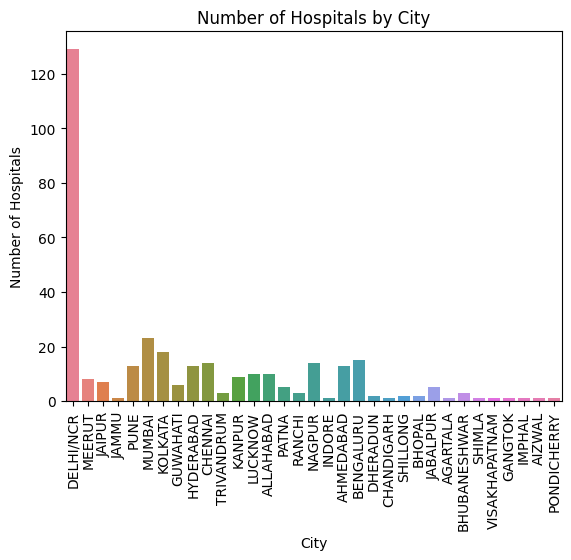

In [33]:
sns.countplot(data=data,x='cityName',hue='cityName')
plt.xlabel('City')
plt.ylabel('Number of Hospitals')
plt.xticks(rotation=90)
plt.title('Number of Hospitals by City')
plt.show()

# Types of Hospitals in India/ Count by Category

In [37]:
data['category'].value_counts()

category
alopathic    283
ayurvedic     26
homeo         21
unani          6
siddha         1
Name: count, dtype: int64

Text(0.5, 1.0, 'Count by Category')

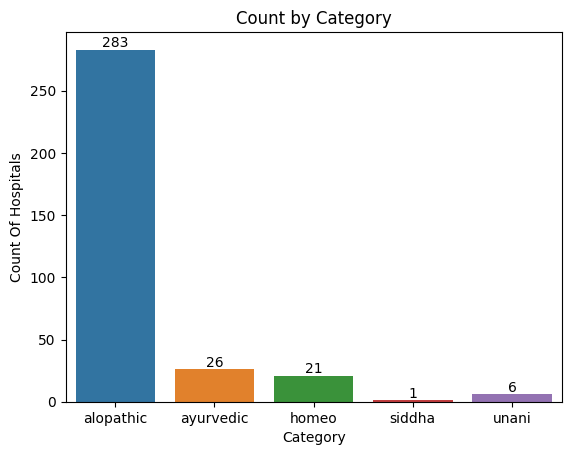

In [80]:
ax=sns.countplot(data=data,x='category',hue='category')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 5), 
                 textcoords = 'offset points')
    
plt.xlabel('Category')
plt.ylabel('Count Of Hospitals')
plt.title('Count by Category')

# Types of Hospitals in Each City/ Category By Count Each City

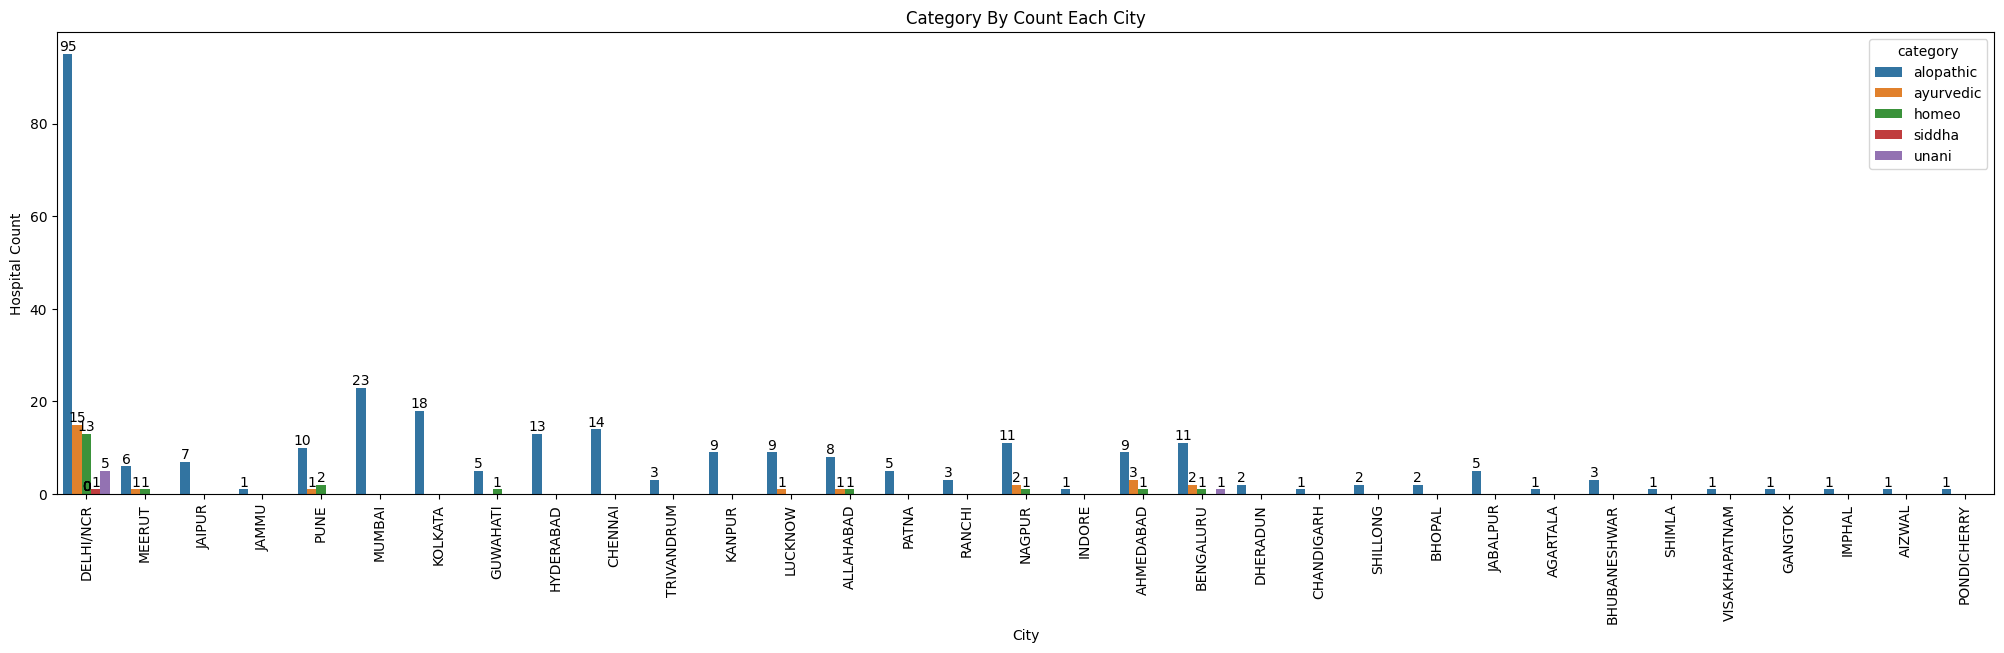

In [79]:
plt.figure(figsize=(25,6))

ax=sns.countplot(data=data,x='cityName',hue='category')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 5), 
                 textcoords = 'offset points')
    
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Hospital Count')
plt.title('Category By Count Each City')
plt.show()


In [81]:
data.head()

,cityCode,cityName,wellnessCentreCode,wellnessCentreName,doctorCount,category,wellnessCentreContactNo,longitude,latitude
0,11,DELHI/NCR,999,Virtual Dispensary,13,alopathic,NaN,0.000000,0.000000
1,11,DELHI/NCR,AY19,Dev Nagar (Ayurvedic),2,ayurvedic,25860275,77.184029,28.654448
2,11,DELHI/NCR,AY63,Sadiq Nagar,3,ayurvedic,011-24623767,77.226784,28.554974
3,11,DELHI/NCR,AY80,Paschim Vihar (Ayurvedic),3,ayurvedic,25171213,77.112274,28.645285
4,11,DELHI/NCR,AYHO,AYURVEDIC HOSPITAL LODHI ROAD,4,ayurvedic,NaN,77.220360,28.582735


# Number of Doctors Present in total in each City Hospital Working

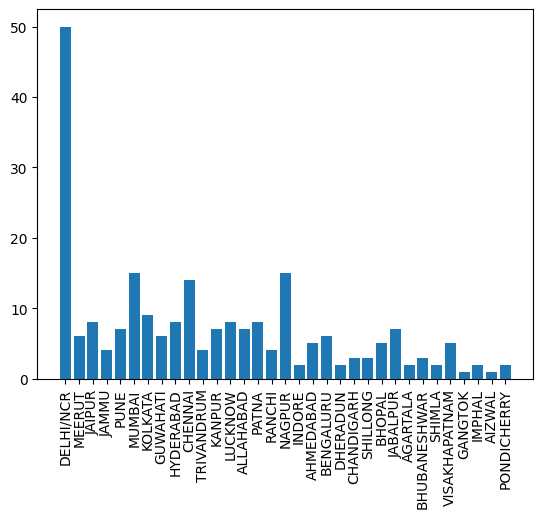

In [122]:
ax=plt.bar(data=data,x='cityName',height='doctorCount')
    
plt.xticks(rotation=90)
plt.show()

#plt.figure(figsize=(25,5))

sns.countplot(data=data,x='cityName',hue='doctorCount')
plt.xticks(rotation=90)
plt.show()